In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# word cloud **customization**
# PIL **customization**

In [2]:
base_url = "https://www.whitehouse.gov/briefing-room"

In [3]:
source = requests.get(base_url, headers = {'User-Agent':'Mozilla/5.0 (X11; Linux)'})

In [5]:
soup = BeautifulSoup(source.content, 'html.parser')

# First page scraping

In [6]:
a_tag = soup.find_all('a', {'class':'news-item__title acctext--con'})

In [12]:
first_page = []

In [13]:
for title in a_tag:
    first_page.append(title.get_text().replace('\t','').replace('\n',''))

In [14]:
print(first_page)

['Statement of President Joe Biden on the Passing of Vernon Jordan ', 'Readout of the White House’s Meeting with Electric Vehicle Charging Infrastructure Leaders ', 'Readout of Vice President Kamala Harris Call with Prime Minister Scott Morrison of Australia ', 'Statement by President Joe Biden and Nominee for Director of the Office of Management Neera Tanden ', 'Remarks by President Biden on the Administration’s COVID-19 Vaccination Efforts ', 'Readout of President Joseph R. Biden, Jr. Call with Senate Democratic Caucus ', 'Press Briefing by Press Secretary Jen Psaki, March 2, 2021 ', 'Statement by NSC Spokesperson Emily Horne on National Security Advisor Jake Sullivan’s Call with Luigi Mattiolo, Diplomatic Advisor to the Italian Prime Minister ', 'Statement by NSC Spokesperson Emily Horne on National Security Advisor Jake Sullivan’s Call with National Security Advisor Suh Hoon of the Republic of Korea ', 'U.S.-Mexico Joint Declaration']


# Rest of the page

In [23]:
article_title = []

In [24]:
page = np.arange(2,20)

In [25]:
for pg in page:
    base = base_url + f"page/{pg}/" + "index.html"
    rqst = requests.get(base, headers = {'User-Agent':'Mozilla/5.0 (X11; Linux)'})
    soup_ = BeautifulSoup(rqst.content, 'lxml')
    article_tag = soup.find_all('a', {'class':'news-item__title acctext--con'})
    
    for art in article_tag:
        article_title.append(art.get_text().replace('\t','').replace('\n',''))

In [65]:
print(article_title[:20])

['Statement of President Joe Biden on the Passing of Vernon Jordan ', 'Readout of the White House’s Meeting with Electric Vehicle Charging Infrastructure Leaders ', 'Readout of Vice President Kamala Harris Call with Prime Minister Scott Morrison of Australia ', 'Statement by President Joe Biden and Nominee for Director of the Office of Management Neera Tanden ', 'Remarks by President Biden on the Administration’s COVID-19 Vaccination Efforts ', 'Readout of President Joseph R. Biden, Jr. Call with Senate Democratic Caucus ', 'Press Briefing by Press Secretary Jen Psaki, March 2, 2021 ', 'Statement by NSC Spokesperson Emily Horne on National Security Advisor Jake Sullivan’s Call with Luigi Mattiolo, Diplomatic Advisor to the Italian Prime Minister ', 'Statement by NSC Spokesperson Emily Horne on National Security Advisor Jake Sullivan’s Call with National Security Advisor Suh Hoon of the Republic of Korea ', 'U.S.-Mexico Joint Declaration', 'Statement of President Joe Biden on the Passin

In [50]:
article_title = article_title + first_page

In [51]:
len(article_title)

190

In [52]:
joined_article = ' '.join(article_title)

In [53]:
wordcloud = WordCloud(background_color = "black", max_words = 2000, width = 1024, height=720)
wordcloud.generate(joined_article)

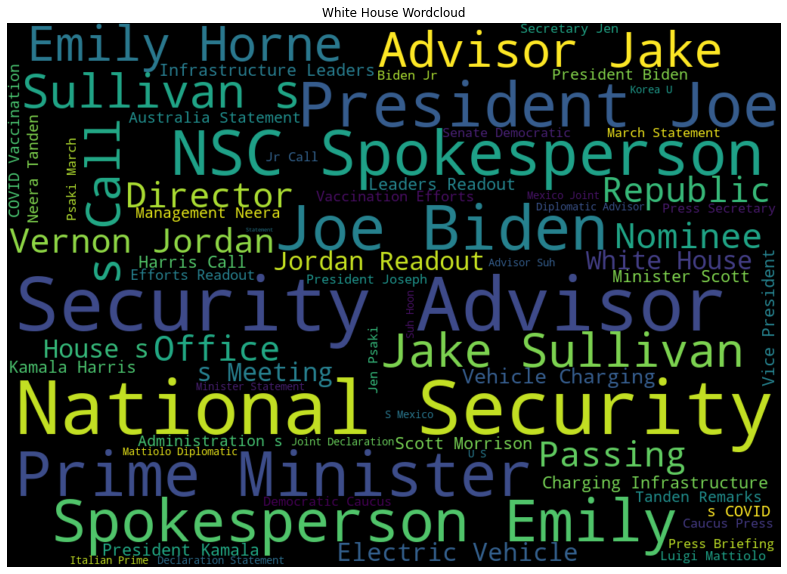

In [54]:
plt.figure(figsize=(25, 10))
plt.title("White House Wordcloud")
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.show()

# Date span of these articles

In [60]:
date_list = []

In [61]:
page = np.arange(2,30)

In [62]:
for pg in page:
    base = base_url + f"page/{pg}/" + "index.html"
    rqst = requests.get(base, headers = {'User-Agent':'Mozilla/5.0 (X11; Linux)'})
    soup_ = BeautifulSoup(rqst.content, 'lxml')
    article_tag = soup.find_all('time', {'posted-on entry-date published updated'})
    
    for art in article_tag:
        date_list.append(art.get_text().replace('\t','').replace('\n',''))

In [66]:
set(date_list)

{'March 01, 2021', 'March 02, 2021'}